# Salary Prediction Model

In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Loading the processed data

In [2]:
#import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
#import training and test set
x = pd.read_excel('data\Processed\Processed_train.xlsx','Sheet1',index_col=None)
test = pd.read_excel('data\Processed\Processed_test.xlsx','Sheet1',index_col=None)
y = pd.read_excel('data\Processed\Processed_y.xlsx','Sheet1',index_col=None)
#Success
print('There are {} number of candidates in training dataset'.format(x.shape[0]))
print('There are {} number of candidates in test dataset'.format(test.shape[0]))

There are 3998 number of candidates in training dataset
There are 1500 number of candidates in test dataset


### Defining a performance metric

The final test evaluation is done using the evaluation metric RMSE(Root Mean Squared Error). This metric tells us how accurate our regression model is.

We will also use the $R^{2}$ or the coefficient of determination which will quantify how accurate our regression model is on a scale of 0 to 1


In [28]:
#Importing the r2_score metric from sklearn
from sklearn.metrics import r2_score
#Defining a function whihc evaluates the RMSE metric
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

### Splitting processed data into training and validation sets

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(x,y['Salary'],test_size=0.2,random_state=42)

### Deciding a model for prediction
We will use try out three different models for prediction:

1. Linear Regressor with L2 regularization (Ridge Regression)
2. Support Vector Regressor
3. XGBoost Regressor

### Defining and training the models

In [10]:
LinReg = LinearRegression()
SVReg  = SVR()
XGBReg = XGBRegressor()

for model in [LinReg,SVReg,XGBReg]:
    model.fit(X_train,y_train)

In [27]:
for model in [LinReg,SVReg,XGBReg]:
    print('{} R2_score : {}'.format(str(model).split('(')[0],r2_score(y_valid,model.predict(X_valid))))
    print('{} RMSE     : {}'.format(str(model).split('(')[0],rmse(y_valid,model.predict(X_valid))))

LinearRegression R2_score : 0.20025197151850982
LinearRegression RMSE     : 152501.12408893937
SVR R2_score : -0.00010371421172572504
SVR RMSE     : 170537.1402148977
XGBRegressor R2_score : -0.08420681158054721
XGBRegressor RMSE     : 177563.0194329497


### Tuning Hyperparameters of each model to get the best results

In [130]:
#Linear Regression
LinReg = Ridge(alpha=300)
LinReg.fit(X_train,y_train)
# SVReg
SVReg= SVR(kernel  ='linear',C=200)
SVReg.fit(X_train,y_train)
#XGBRegressor
XGBReg = XGBRegressor(max_depth=6,n_estimators=10000,reg_lambda=217,min_child_weight=3,n_jobs=-1)
XGBReg.fit(X_train, y_train,early_stopping_rounds=100, eval_metric="rmse", eval_set=[(X_valid,y_valid)], verbose=False)

print('Models successfully trained!!')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=217, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
for model in [LinReg,SVReg,XGBReg]:
    print('{} R2_score : {}'.format(str(model).split('(')[0],r2_score(y_valid,model.predict(X_valid))))
    print('{} RMSE     : {}'.format(str(model).split('(')[0],rmse(y_valid,model.predict(X_valid))))

Ridge R2_score : 0.20562987167029168
Ridge RMSE     : 151987.51280524427
SVR R2_score : 0.19357170490309872
SVR RMSE     : 153136.71778784436
XGBRegressor R2_score : 0.21344333404906213
XGBRegressor RMSE     : 151238.1874480841


[Text(0, 0.5, 'RMSE'), Text(0.5, 1.0, 'RMSE of different models')]

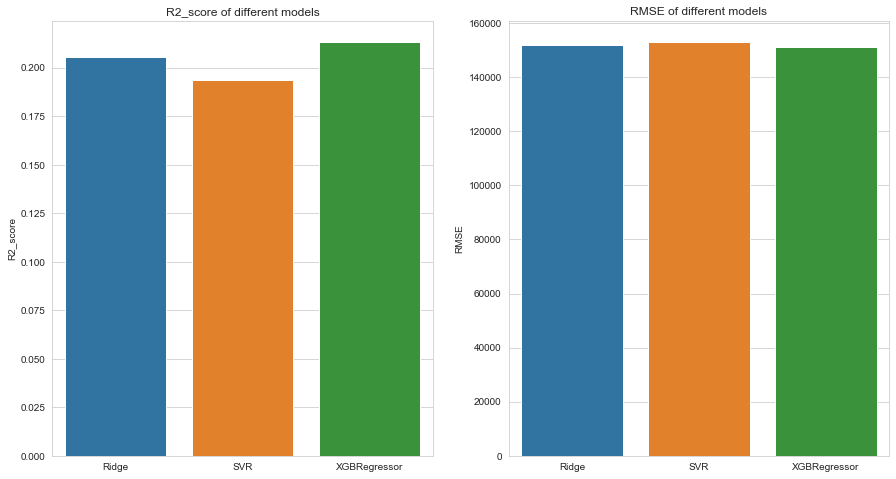

In [142]:
fig,ax = plt.subplots(1,2,figsize = (15,8))
sns.barplot(x = np.array(['Ridge','SVR','XGBRegressor']),y= np.array([r2_score(y_valid,model.predict(X_valid)) for model in [LinReg,SVReg,XGBReg]]),ax=ax[0])
ax[0].set(ylabel = 'R2_score',title = 'R2_score of different models')

sns.barplot(x = np.array(['Ridge','SVR','XGBRegressor']),y= np.array([rmse(y_valid,model.predict(X_valid)) for model in [LinReg,SVReg,XGBReg]]),ax=ax[1])
ax[1].set(ylabel = 'RMSE',title = 'RMSE of different models')


# Analysis of our model results

We tried three out different models to predict the salary of a candidate.

From these three models,we made the following observations:
* LinearRegression without any hyperparameter tuning works much better than any other model.
* However tuning the hyperparameters of XGBoost makes a model which produces better results than the Linear model
* As the accuracies between the Linear models and ensemble models is not much ,we can safely say that  basic linear models work as well as other powerful models.

Using these three models ,we made submissions of the test dataset at http://leaderboard.aspiringminds.com/ and the RMSE values obtained are plotted below

[Text(0, 0.5, 'Test RMSE values'),
 Text(0.5, 0, 'Model'),
 Text(0.5, 1.0, 'RMSE scores of our models on the test dataset')]

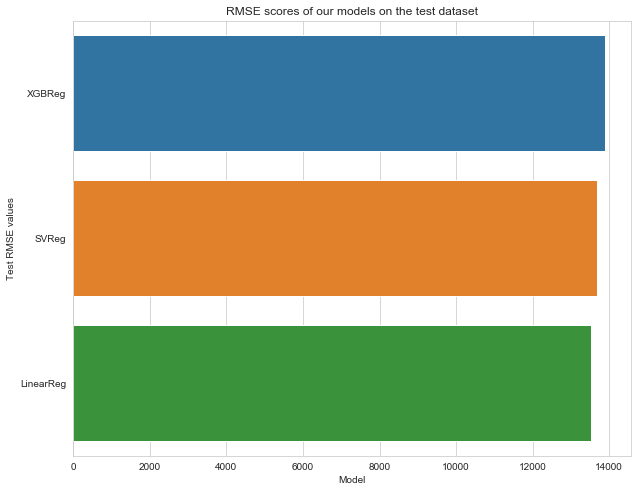

In [144]:
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = [13885.2,13672.6,13535.6],y = ['XGBReg','SVReg','LinearReg'])
ax.set(ylabel = 'Test RMSE values',xlabel = 'Model',title ='RMSE scores of our models on the test dataset')

## Feature Importances 

We will show importance of different features in the dataset as given by different models

[Text(0.5, 1.0, 'XGBoost Regressor')]

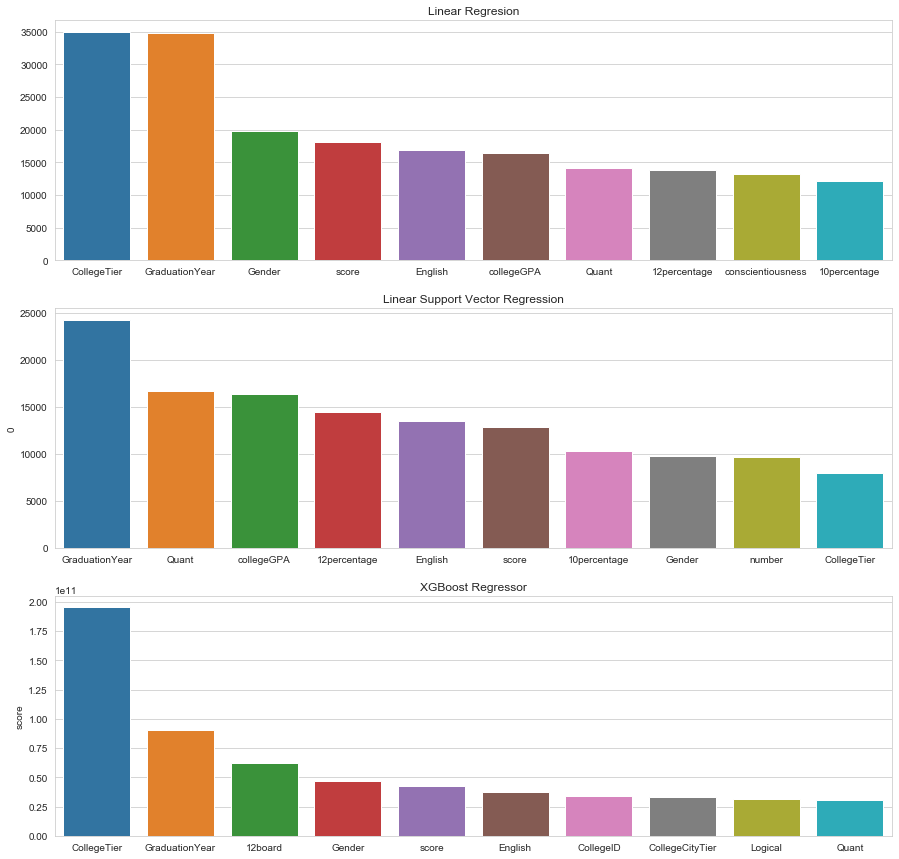

In [193]:
fig,ax=  plt.subplots(3,1,figsize = (15,15))

p  =np.array(abs(LinReg.coef_)).argsort()[-10:][::-1]
f = [abs(LinReg.coef_[i]) for i in p]
g = [X_train.columns[i] for i in p]
sns.barplot(x = g,y=f,ax=ax[0])
ax[0].set(title = 'Linear Regresion')

a = pd.DataFrame(pd.Series(abs(SVReg.coef_[0]), index=X_train.columns).nlargest(10))
sns.barplot(x = a.index,y =a[0],ax=ax[1])
ax[1].set(title = 'Linear Support Vector Regression')

feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())
data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)[:10]
sns.barplot(x= data.index,y = data['score'],ax=ax[2])
ax[2].set(title = 'XGBoost Regressor')

# Final model used

* Based on the above analysis we can see that XGBoost Regressor works slightly better than the other models.



* So we were able to make a model which gave a RMSE of about 13500 on the test dataset which ranked at 49 in the competition leaderboards.

